<a href="https://colab.research.google.com/github/love7brar/ml-model-anti-microbial-peptides/blob/main/AMP_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


--2024-04-18 16:24:43--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   111MB/s    in 0.7s    

2024-04-18 16:24:44 (111 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6

In [ ]:
!pip install pandas

     |████████████████████████████████| 11.3 MB 5.0 MB/s 
     |████████████████████████████████| 15.7 MB 40.2 MB/s 
     |████████████████████████████████| 229 kB 43.9 MB/s 
     |████████████████████████████████| 505 kB 43.0 MB/s 


In [ ]:
!pip install scikit-learn

     |████████████████████████████████| 24.8 MB 1.3 MB/s 
     |████████████████████████████████| 302 kB 40.2 MB/s 
     |████████████████████████████████| 38.1 MB 80 kB/s 


In [ ]:
import pandas as pd

amp_df = pd.read_csv("merged_amp.csv")
nonamp_df = pd.read_csv("merged_nonamp.csv")

amp_df['Class'] = 1  # Assign 1 to positive class
nonamp_df['Class'] = 0  # Assign 0 to negative class

merged_df = pd.concat([amp_df, nonamp_df], ignore_index=True)

merged_df.to_csv('mergedfeatures.csv', index=False)

In [ ]:
import pandas as pd

feature_df = pd.read_csv('mergedfeatures.csv')

# Assign the features to X and class label to y
X = feature_df.drop('Class', axis=1)
y = feature_df['Class'].copy()

print("Features loaded from mergedfeatures.csv")

Features loaded from mergedfeatures.csv


In [ ]:
y_test

In [ ]:
!pip install lazypredict


  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.4 MB/s eta 0:00:00


In [ ]:
pip install --upgrade pip setuptools


     |████████████████████████████████| 2.1 MB 3.8 MB/s 
     |████████████████████████████████| 804 kB 11.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 45.2.0.post20200210
    Uninstalling setuptools-45.2.0.post20200210:
      Successfully uninstalled setuptools-45.2.0.post20200210


In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer  # Import SimpleImputer to handle missing values

data = pd.read_csv('mergedfeatures.csv')

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Separate the features (X) and the target variable (y), excluding the 'ID' column
X = data_imputed.drop(['Class', 'ID'], axis=1)
y = data_imputed['Class']

clf = RandomForestClassifier()

n_features_to_select = 5
rfe = RFE(estimator=clf, n_features_to_select=n_features_to_select)

rfe.fit(X, y)

selected_features = X.columns[rfe.support_]

print("Selected Features:")
print(selected_features)

selected_features_df = pd.DataFrame(selected_features, columns=['Feature'])

selected_features_df.to_csv('selected_features.csv', index=False)


Selected Features:
Index(['AAC_K', 'PCP_PC', 'PCP_NC', 'PCP_BS', 'PAAC1_lam1'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score


data = pd.read_csv('mergedfeatures.csv')

selected_features = ['AAC_K', 'PCP_PC', 'PCP_NC', 'PCP_BS', 'PAAC1_lam1']

X = data[selected_features]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)


100%|██████████| 29/29 [00:03<00:00,  8.76it/s]

[LightGBM] [Info] Number of positive: 585, number of negative: 618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 1203, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486284 -> initscore=-0.054877
[LightGBM] [Info] Start training from score -0.054877
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.85               0.85     0.85      0.85   
CalibratedClassifierCV             0.85               0.85     0.85      0.85   
LogisticRegression                 0.85               0.85     0.85      0.85   
NuSVC                              0.83               0.83     0.83      0.83   
LinearDiscriminantAnalysis 

In [ ]:
pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 3.5 MB/s eta 0:00:00
  Using cached packaging-24.0-py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.3 MB/s eta 0:00:00
Using cached packaging-24.0-py3-none-any.whl (53 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 6.9 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd

class CustomLazyClassifier(LazyClassifier):
    def _get_models(self):
        models = super()._get_models()
        # Add CalibratedClassifierCV and SVC to the list of models
        models['CalibratedClassifierCV'] = CalibratedClassifierCV()
        models['SVC'] = SVC(probability=True)
        return models

data = pd.read_csv('mergedfeatures.csv')

selected_features = ['AAC_K', 'PCP_PC', 'PCP_NC', 'PCP_BS', 'PAAC1_lam1']

X = data[selected_features]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = CustomLazyClassifier(predictions=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

y_pred = predictions['CalibratedClassifierCV']

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


100%|██████████| 29/29 [00:04<00:00,  6.31it/s]

[LightGBM] [Info] Number of positive: 585, number of negative: 618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 1203, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486284 -> initscore=-0.054877
[LightGBM] [Info] Start training from score -0.054877
Accuracy: 0.8504983388704319


In [ ]:
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

class CustomLazyClassifier(LazyClassifier):
    def _get_models(self):
        models = super()._get_models()
        # Add Logistic Regression to the list of models
        models['LogisticRegression'] = LogisticRegression()
        return models

data = pd.read_csv('mergedfeatures.csv')

selected_features = ['AAC_K', 'PCP_PC', 'PCP_NC', 'PCP_BS', 'PAAC1_lam1']

X = data[selected_features]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = CustomLazyClassifier(predictions=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

y_pred = predictions['LogisticRegression']  # Get predictions for Logistic Regression

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


100%|██████████| 29/29 [00:01<00:00, 16.74it/s]

[LightGBM] [Info] Number of positive: 585, number of negative: 618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 1203, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486284 -> initscore=-0.054877
[LightGBM] [Info] Start training from score -0.054877
Accuracy: 0.8471760797342193


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('mergedfeatures.csv')

selected_features = ['AAC_K', 'PCP_PC', 'PCP_NC', 'PCP_BS', 'PAAC1_lam1']
X = data[selected_features]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm = SVC(probability=True)  # Using probability=True to enable probability estimates
svm.fit(X_train, y_train)

# Make predictions on test data
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7308970099667774


In [ ]:
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

y_pred = predictions['RandomForestClassifier']

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


100%|██████████| 29/29 [00:03<00:00,  7.48it/s]

[LightGBM] [Info] Number of positive: 585, number of negative: 618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 1203, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486284 -> initscore=-0.054877
[LightGBM] [Info] Start training from score -0.054877
Accuracy: 0.8205980066445183


100%|██████████| 29/29 [00:02<00:00,  9.90it/s]


[LightGBM] [Info] Number of positive: 585, number of negative: 618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 1203, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486284 -> initscore=-0.054877
[LightGBM] [Info] Start training from score -0.054877


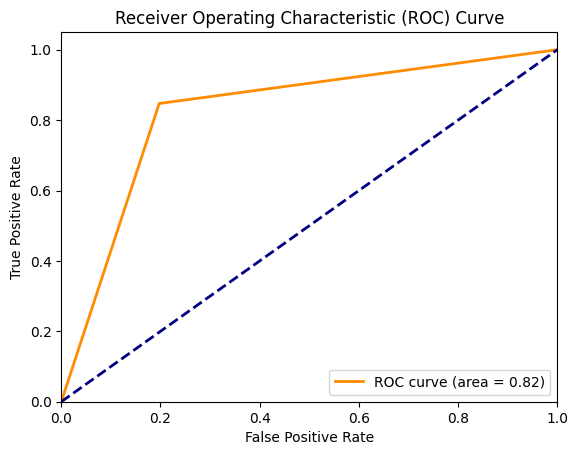

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

y_pred_proba = predictions['RandomForestClassifier']

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


100%|██████████| 29/29 [00:01<00:00, 15.21it/s]


[LightGBM] [Info] Number of positive: 585, number of negative: 618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 1203, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486284 -> initscore=-0.054877
[LightGBM] [Info] Start training from score -0.054877


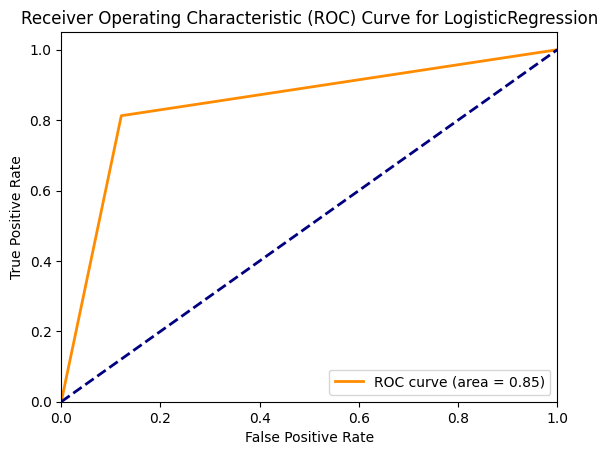

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Specify the name of the classifier you want to plot ROC curve for
classifier_name = 'LogisticRegression'

y_pred_proba = predictions[classifier_name]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ' + classifier_name)
plt.legend(loc="lower right")
plt.show()


100%|██████████| 29/29 [00:03<00:00,  7.68it/s]


[LightGBM] [Info] Number of positive: 585, number of negative: 618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 1203, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486284 -> initscore=-0.054877
[LightGBM] [Info] Start training from score -0.054877


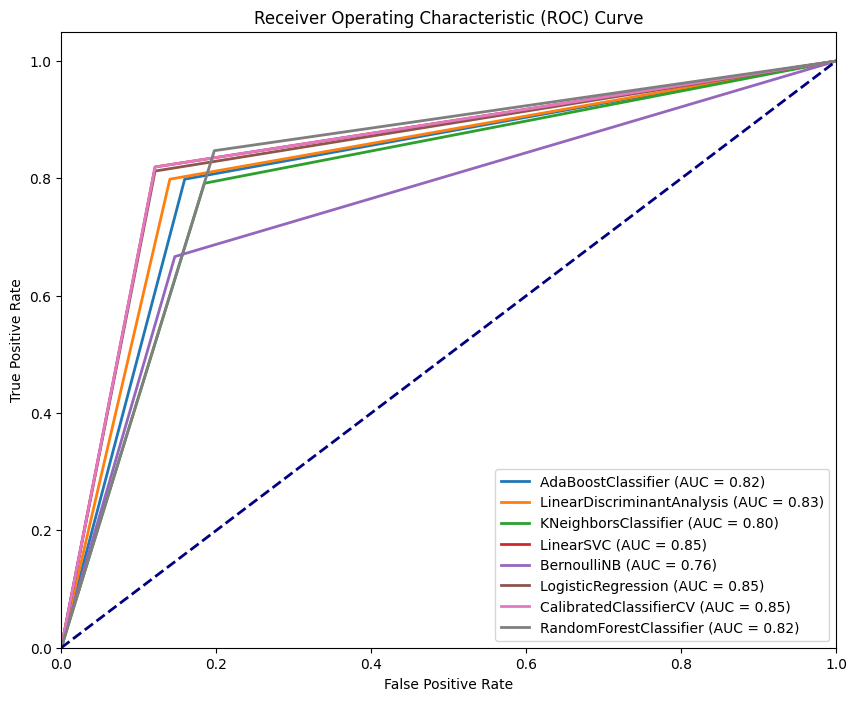

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

plt.figure(figsize=(10, 8))
for model_name in ['AdaBoostClassifier', 'LinearDiscriminantAnalysis', 'KNeighborsClassifier',
                   'LinearSVC', 'BernoulliNB',
                   'LogisticRegression', 'CalibratedClassifierCV',
                   'RandomForestClassifier']:
    if model_name in predictions.columns:
        y_pred_proba = predictions[model_name]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

selected_models = ['AdaBoostClassifier', 'LinearDiscriminantAnalysis', 'KNeighborsClassifier',
                   'LinearSVC', 'BernoulliNB',
                   'LogisticRegression', 'CalibratedClassifierCV',
                   'RandomForestClassifier']

for model_name in selected_models:
    if model_name in predictions.columns:
        y_pred = predictions[model_name]
        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_pred))


100%|██████████| 29/29 [00:01<00:00, 17.81it/s]


[LightGBM] [Info] Number of positive: 585, number of negative: 618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 1203, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486284 -> initscore=-0.054877
[LightGBM] [Info] Start training from score -0.054877
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       157
           1       0.82      0.80      0.81       144

    accuracy                           0.82       301
   macro avg       0.82      0.82      0.82       301
weighted avg       0.82      0.82      0.82       301

Classification Report for LinearDiscriminantAnalysis:
              precision    recall  f1-score   support

           0       0.82      0.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

selected_models = ['AdaBoostClassifier', 'LinearDiscriminantAnalysis', 'KNeighborsClassifier',
                   'LinearSVC', 'BernoulliNB',
                   'LogisticRegression', 'CalibratedClassifierCV',
                   'RandomForestClassifier']

for model_name in selected_models:
    if model_name in predictions.columns:
        y_pred = predictions[model_name]
        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_pred))

        # Calculate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        # Calculate specificity and sensitivity
        specificity = tn / (tn + fp)
        sensitivity = tp / (tp + fn)

        # Calculate Matthews Correlation Coefficient (MCC)
        mcc = matthews_corrcoef(y_test, y_pred)

        print(f"Specificity: {specificity}")
        print(f"Sensitivity: {sensitivity}")
        print(f"Matthews Correlation Coefficient: {mcc}")


100%|██████████| 29/29 [00:01<00:00, 17.07it/s]

[LightGBM] [Info] Number of positive: 585, number of negative: 618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 1203, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486284 -> initscore=-0.054877
[LightGBM] [Info] Start training from score -0.054877
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       157
           1       0.82      0.80      0.81       144

    accuracy                           0.82       301
   macro avg       0.82      0.82      0.82       301
weighted avg       0.82      0.82      0.82       301

Specificity: 0.8407643312101911
Sensitivity: 0.7986111111111112
Matthews Correlation Coefficient: 0.6403391687643968
Classification Report f

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=5)

selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.support_]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

clf = LazyClassifier(predictions=True)

models, predictions = clf.fit(X_train_selected, X_test_selected, y_train, y_test)

for model_name in models.index:
    if model_name in predictions.columns:

        y_pred = predictions[model_name]

        print(f"Confusion Matrix for {model_name}:")
        print(confusion_matrix(y_test, y_pred))


100%|██████████| 29/29 [00:01<00:00, 16.20it/s]

[LightGBM] [Info] Number of positive: 585, number of negative: 618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 1203, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486284 -> initscore=-0.054877
[LightGBM] [Info] Start training from score -0.054877
Confusion Matrix for AdaBoostClassifier:
[[143  14]
 [ 34 110]]
Confusion Matrix for LinearDiscriminantAnalysis:
[[140  17]
 [ 32 112]]
Confusion Matrix for RidgeClassifierCV:
[[140  17]
 [ 32 112]]
Confusion Matrix for RidgeClassifier:
[[140  17]
 [ 32 112]]
Confusion Matrix for LGBMClassifier:
[[127  30]
 [ 21 123]]
Confusion Matrix for LinearSVC:
[[138  19]
 [ 32 112]]
Confusion Matrix for BernoulliNB:
[[138  19]
 [ 32 112]]
Confusion Matrix for ExtraTreesClassifier:
[[128  29]
 [ 23 121]]
Confusion Matri

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import matthews_corrcoef

data = pd.read_csv('mergedfeatures.csv')

selected_features = ['AAC_K', 'PCP_PC', 'PCP_NC', 'PCP_BS', 'PCP_HB']

X = data[selected_features]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

for model_name in models.index:
    if model_name in predictions.columns:
        y_pred = predictions[model_name]
        mcc = matthews_corrcoef(y_test, y_pred)
        print(f"Matthews Correlation Coefficient for {model_name}: {mcc}")


100%|██████████| 29/29 [00:01<00:00, 16.22it/s]

[LightGBM] [Info] Number of positive: 585, number of negative: 618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 1203, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486284 -> initscore=-0.054877
[LightGBM] [Info] Start training from score -0.054877
Matthews Correlation Coefficient for AdaBoostClassifier: 0.6847865063730116
Matthews Correlation Coefficient for LinearDiscriminantAnalysis: 0.675804327123334
Matthews Correlation Coefficient for RidgeClassifierCV: 0.675804327123334
Matthews Correlation Coefficient for RidgeClassifier: 0.675804327123334
Matthews Correlation Coefficient for LGBMClassifier: 0.6625565607638325
Matthews Correlation Coefficient for LinearSVC: 0.6617238351294378
Matthews Correlation Coefficient for BernoulliNB: 0.6617238351294378


In [ ]:
pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 51.0 MB/s eta 0:00:00


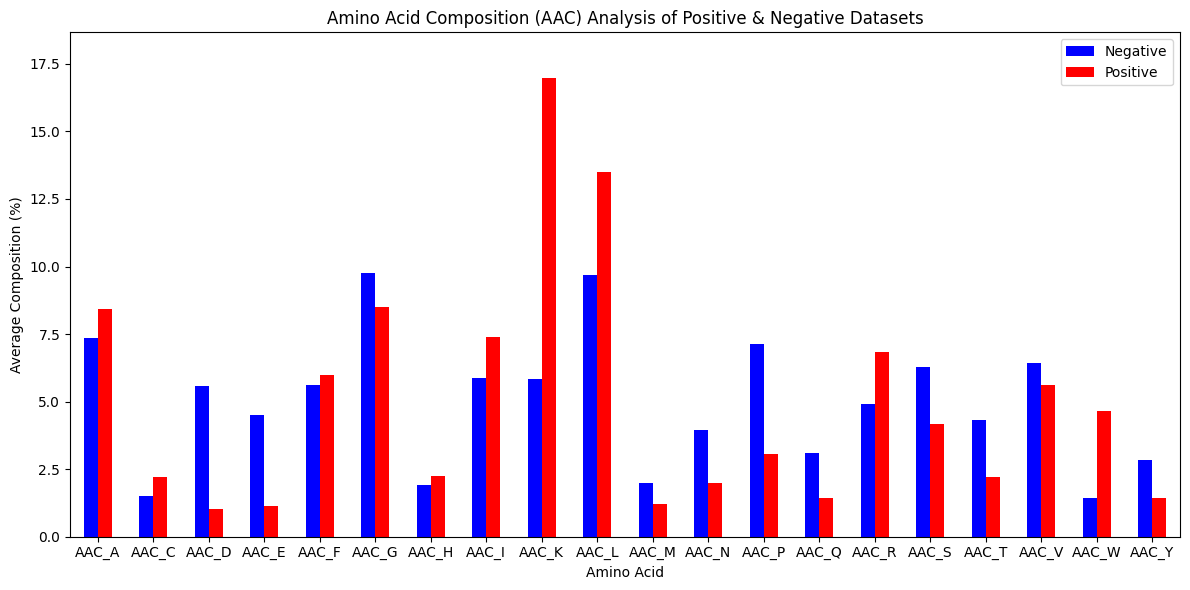

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('mergedaac.csv')

data = data.drop(columns=['ID'])

# Calculate the mean for each amino acid group by 'Class'
grouped_data = data.groupby('Class').mean()

transposed_data = grouped_data.T

plt.figure(figsize=(12, 6))
transposed_data.plot(kind='bar', ax=plt.gca(), color=['blue', 'red'])

# Adjust y-axis limits
plt.ylim(0, transposed_data.max().max() * 1.1)  # Set y-axis limits to 10% higher than the maximum value

plt.xlabel('Amino Acid')
plt.ylabel('Average Composition (%)')
plt.title('Amino Acid Composition (AAC) Analysis of Positive & Negative Datasets')
plt.xticks(rotation=0)
plt.legend(['Negative', 'Positive'])
plt.tight_layout()
plt.show()


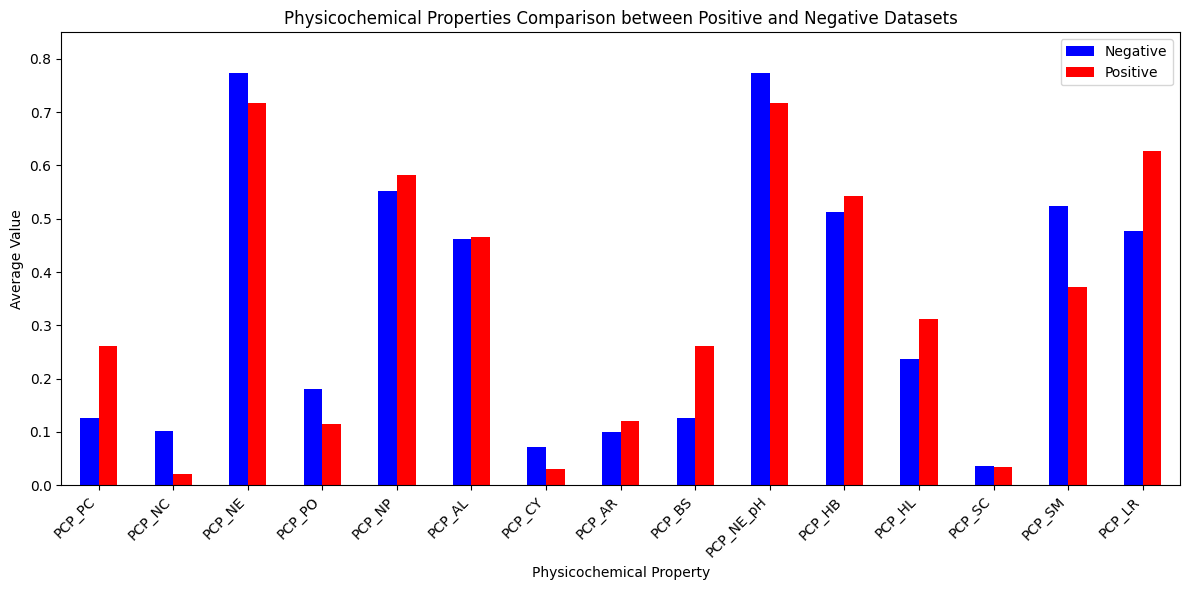

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged PCP dataset
data = pd.read_csv('mergedpcp.csv')

# Exclude 'ID' column
data = data.drop(columns=['ID'])

# Calculate the mean for each physicochemical property group by 'Class'
grouped_data = data.groupby('Class').mean()

# Transpose the DataFrame
transposed_data = grouped_data.T

# Plot a bar plot to compare the average physicochemical properties between positive and negative datasets
plt.figure(figsize=(12, 6))
transposed_data.plot(kind='bar', ax=plt.gca(), color=['blue', 'red'])

# Adjust y-axis limits
plt.ylim(0, transposed_data.max().max() * 1.1)  # Set y-axis limits to 10% higher than the maximum value

plt.xlabel('Physicochemical Property')
plt.ylabel('Average Value')
plt.title('Physicochemical Properties Comparison between Positive and Negative Datasets')
plt.xticks(rotation=45, ha='right')
plt.legend(['Negative', 'Positive'])
plt.tight_layout()
plt.show()


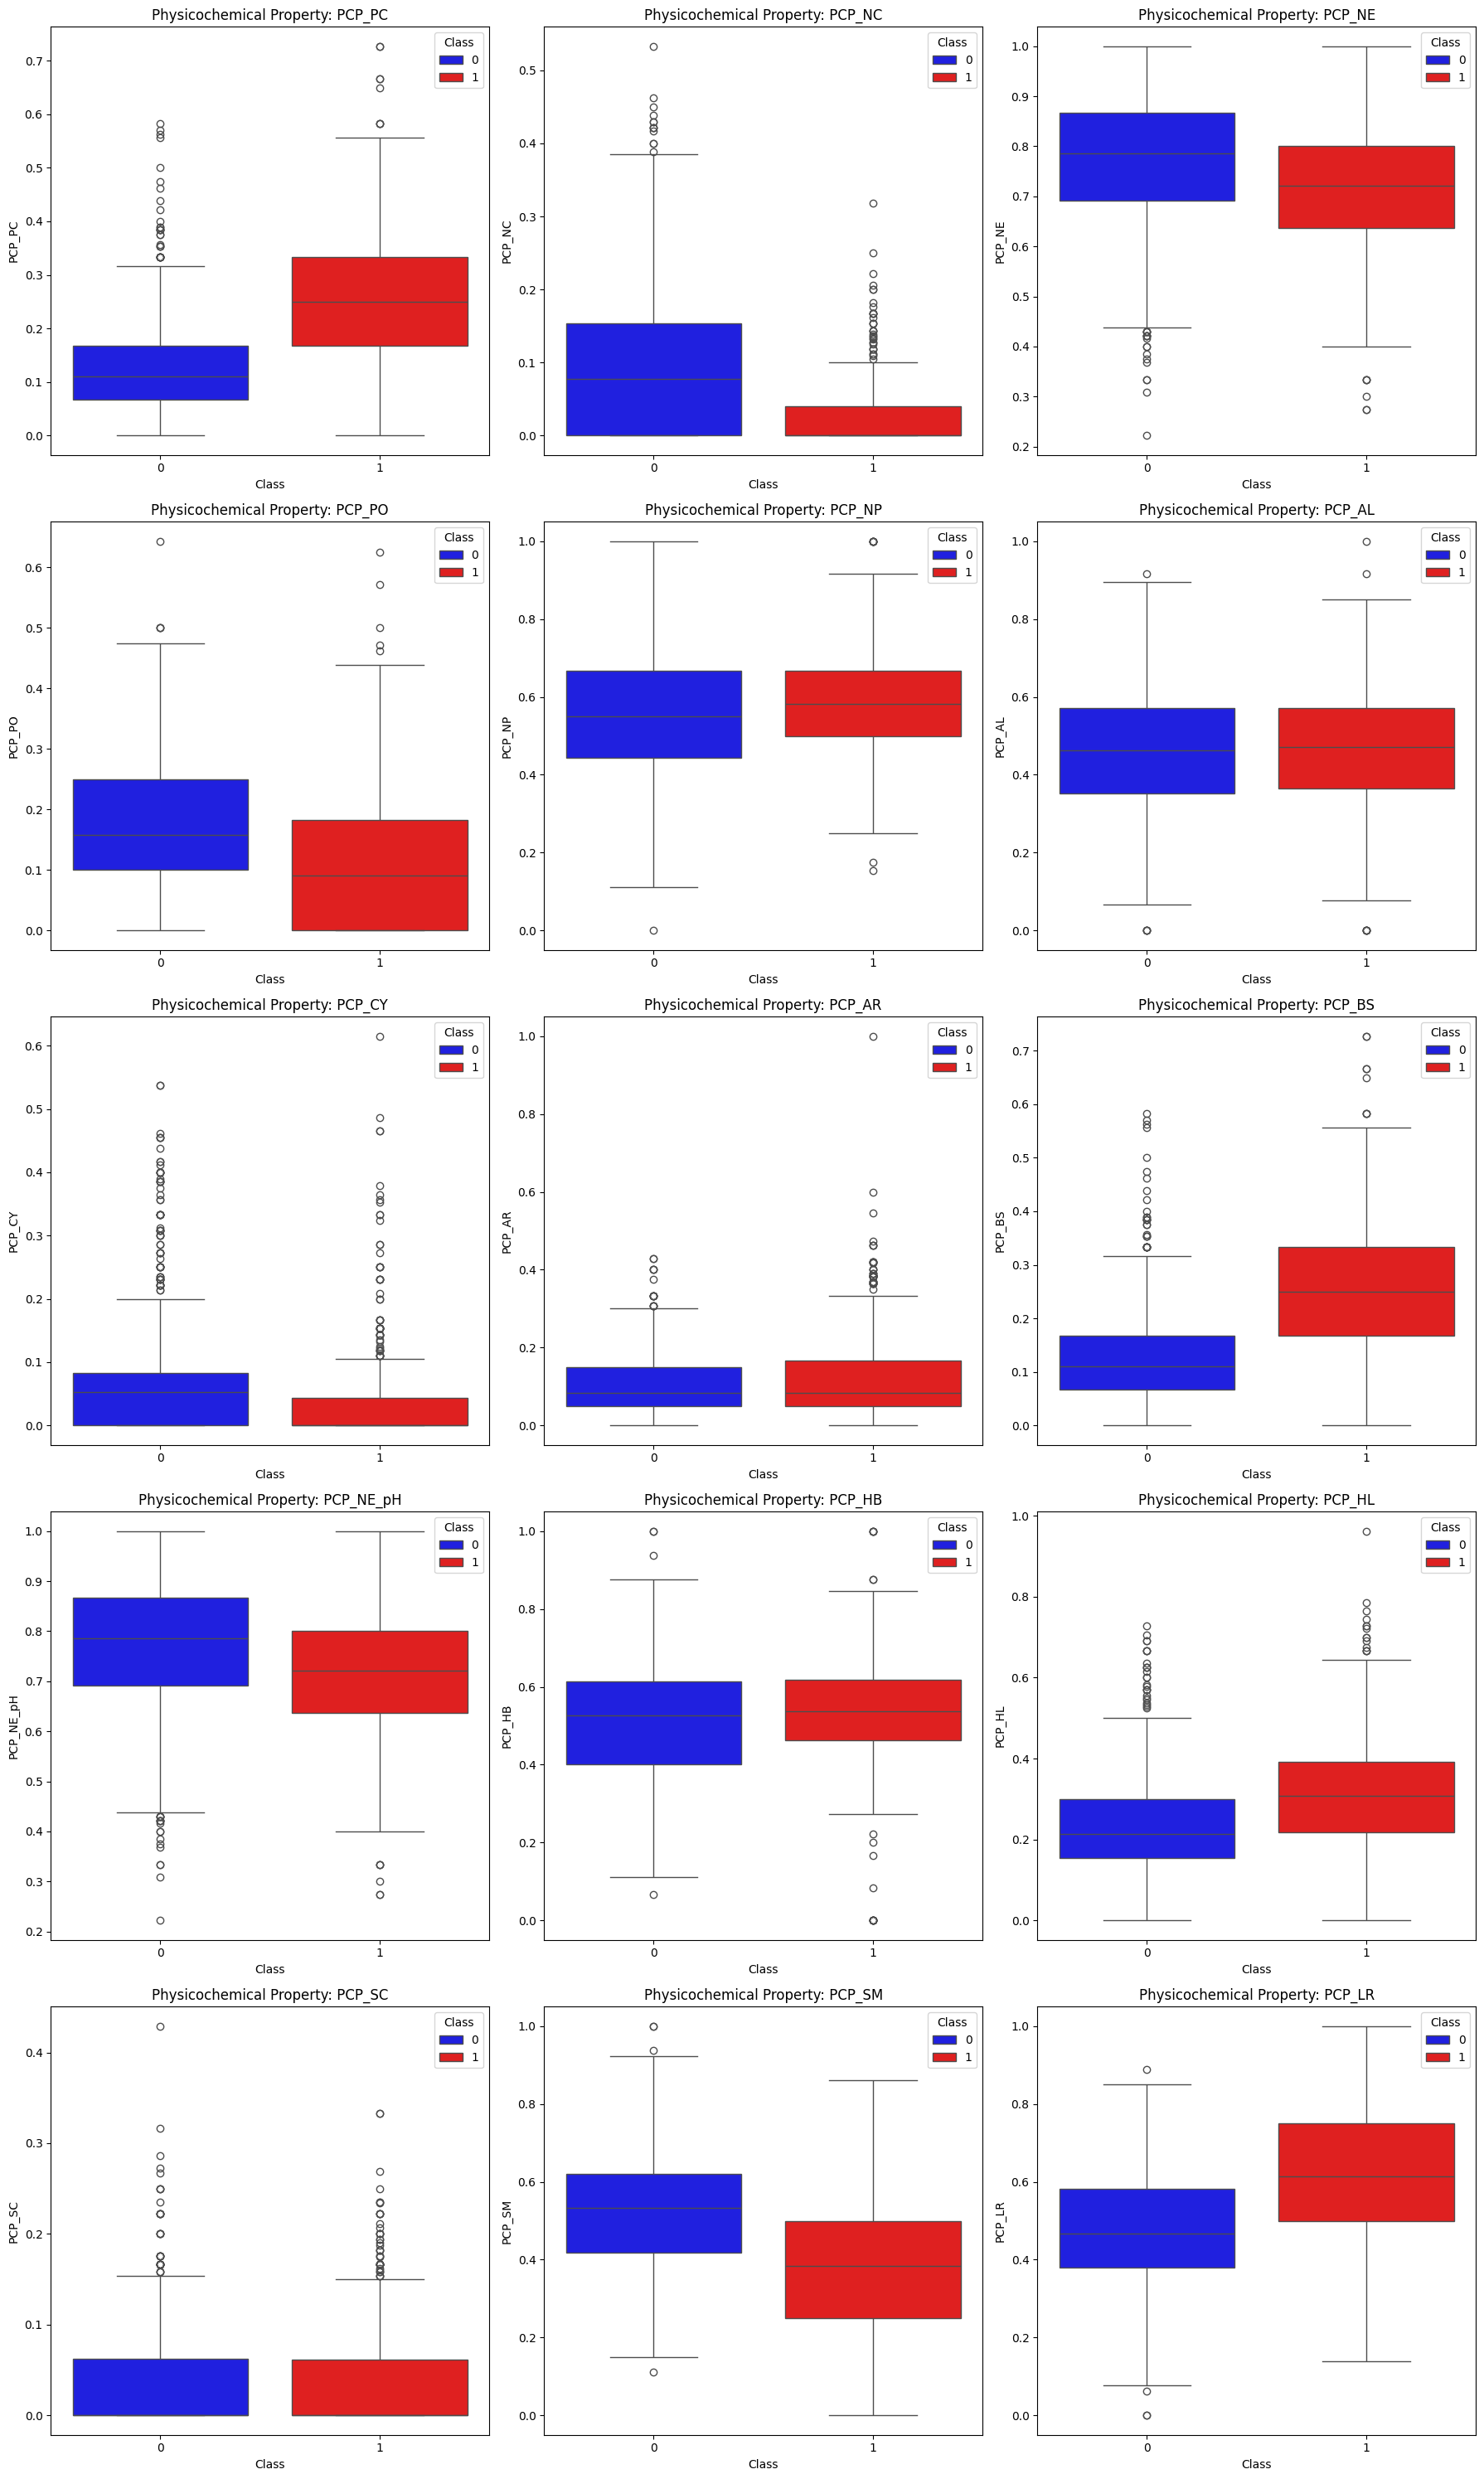

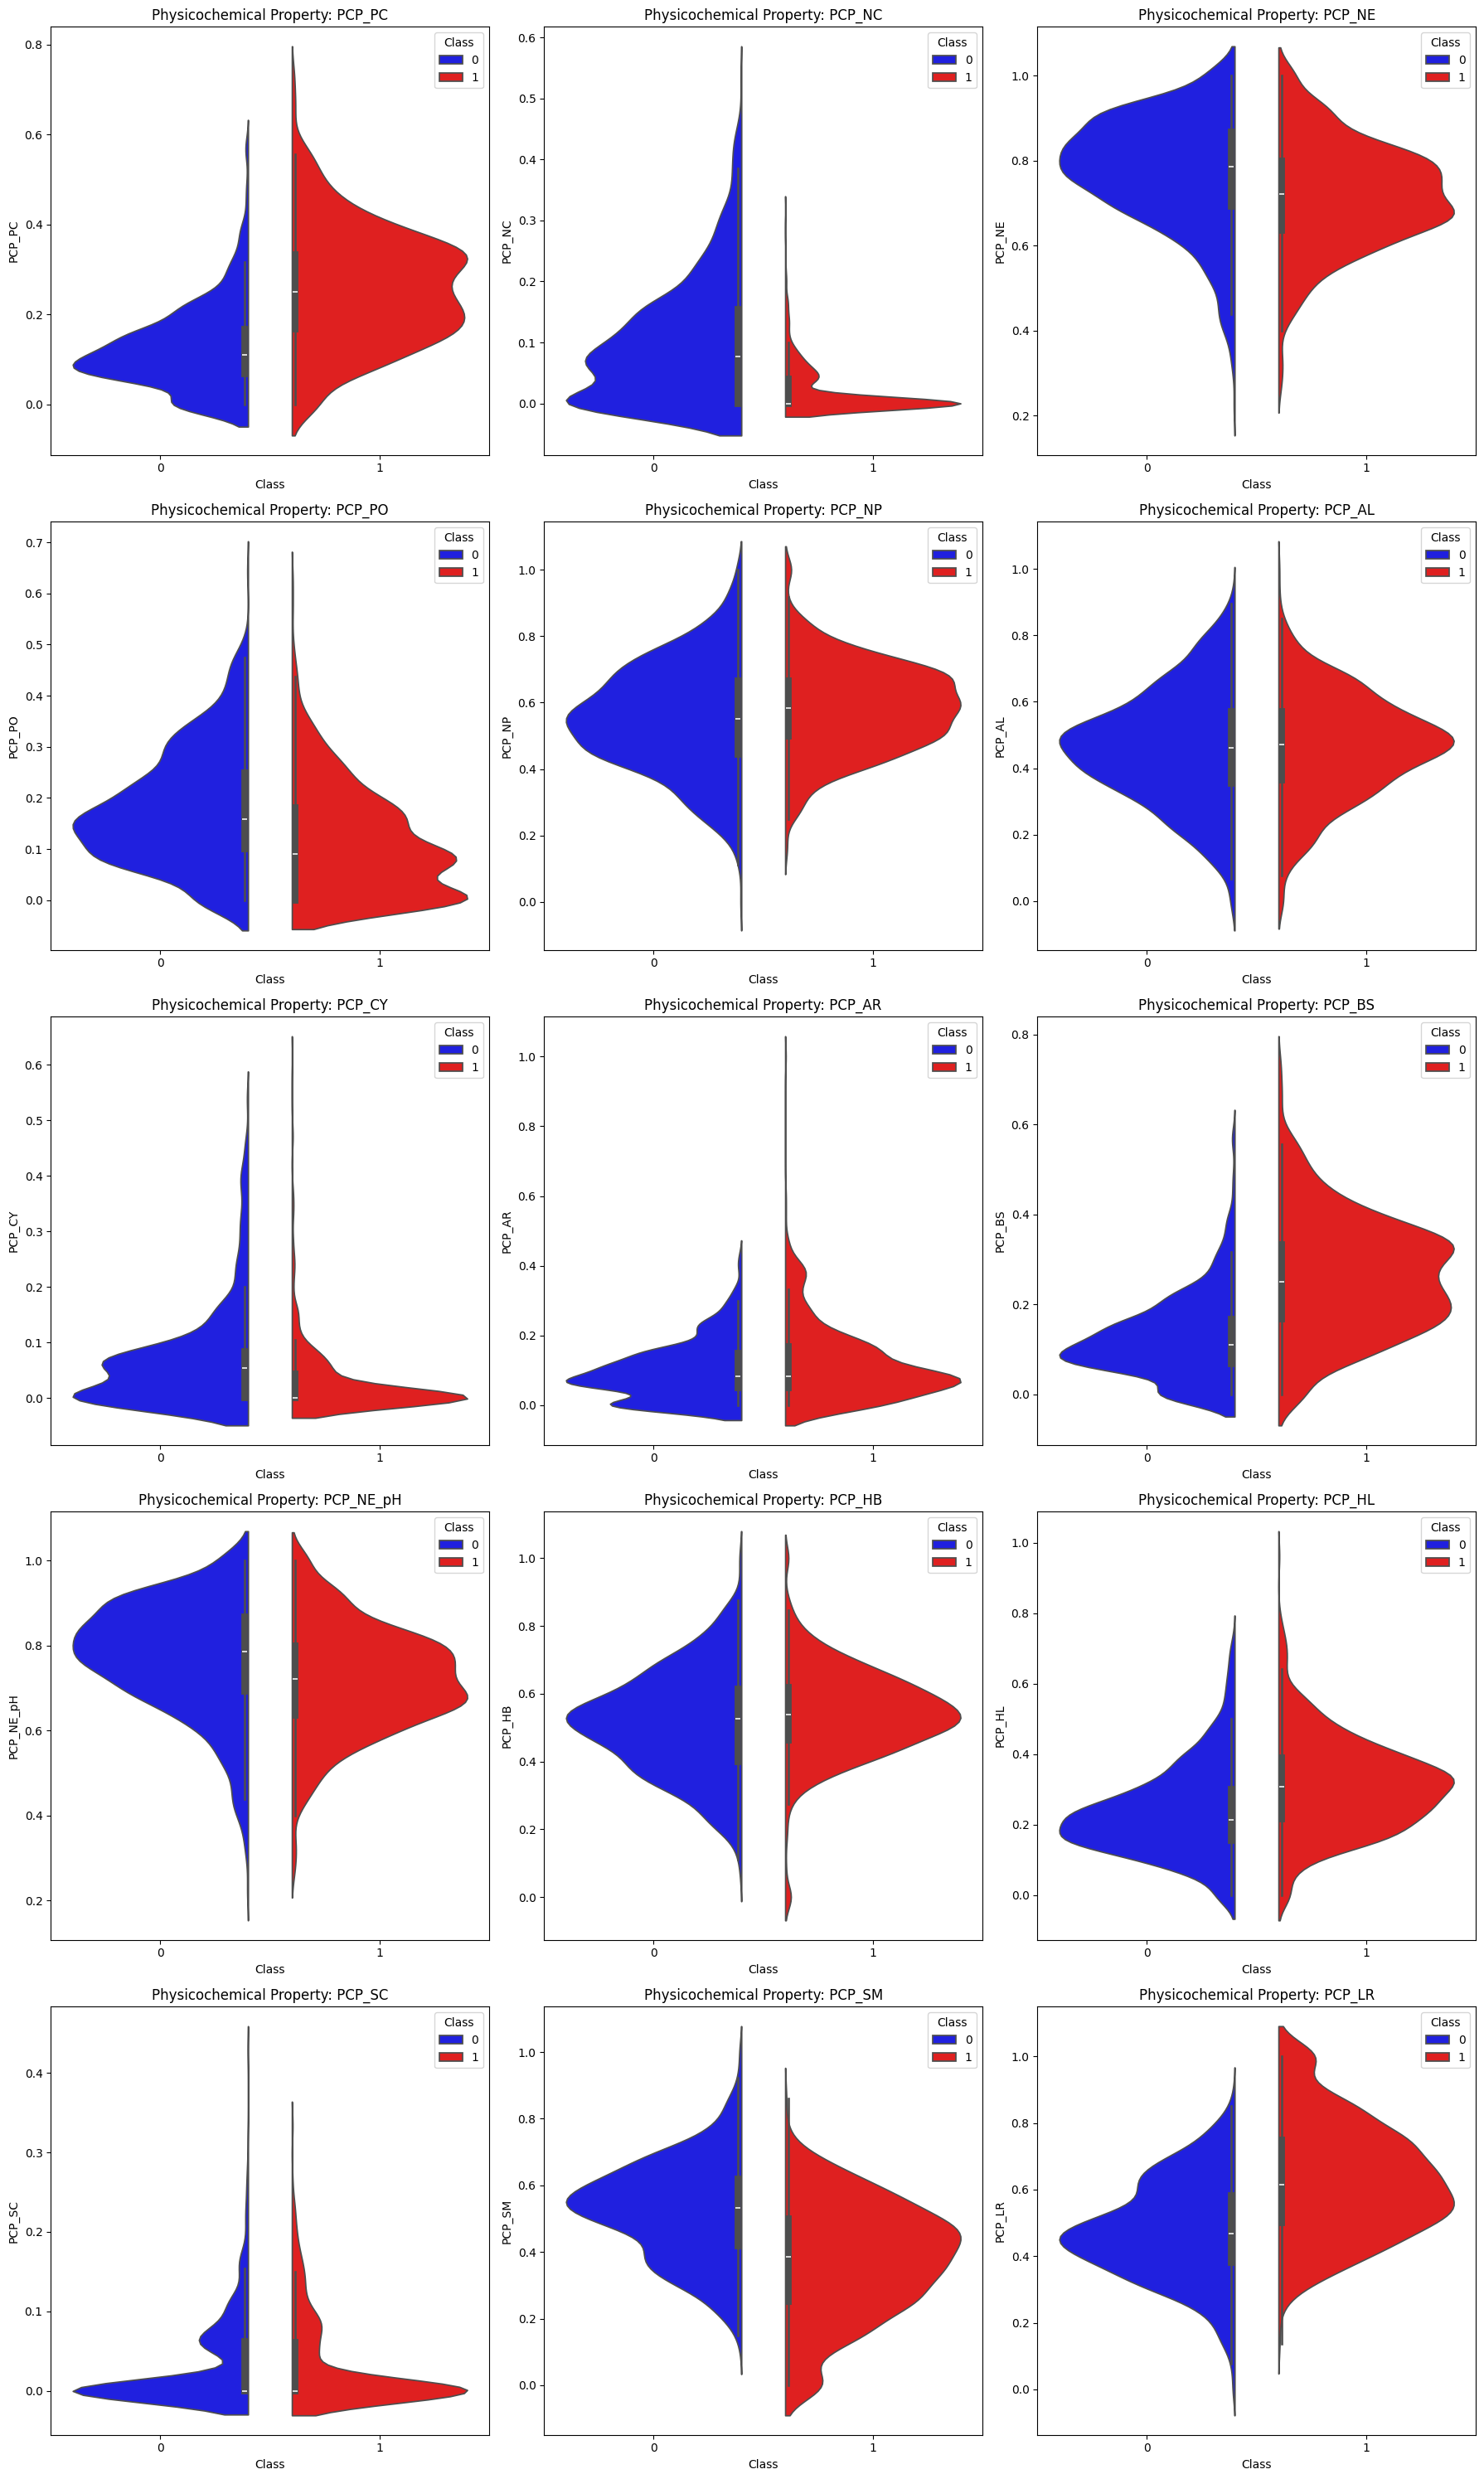

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged PCP dataset
data = pd.read_csv('mergedpcp.csv')

# Exclude 'ID' column
data = data.drop(columns=['ID'])

# Get the list of PCP properties
pcp_properties = data.columns[:-1]  # Exclude the 'Class' column

# Plot box plots for each physicochemical property comparing positive and negative datasets
num_properties = len(pcp_properties)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_properties + num_cols - 1) // num_cols  # Calculate the number of rows

plt.figure(figsize=(18, 6 * num_rows))

for i, prop in enumerate(pcp_properties, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=data, x='Class', y=prop, hue='Class', palette=['blue', 'red'])
    plt.xlabel('Class')
    plt.ylabel(prop)
    plt.title(f'Physicochemical Property: {prop}')

plt.tight_layout()
plt.show()

# Plot violin plots for each physicochemical property comparing positive and negative datasets
plt.figure(figsize=(18, 6 * num_rows))

for i, prop in enumerate(pcp_properties, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.violinplot(data=data, x='Class', y=prop, hue='Class', split=True, palette=['blue', 'red'])
    plt.xlabel('Class')
    plt.ylabel(prop)
    plt.title(f'Physicochemical Property: {prop}')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('mergedfeatures.csv')

selected_features = ['AAC_K', 'PCP_PC', 'PCP_NC', 'PCP_BS', 'PAAC1_lam1']

# Separate features (X) and target variable (y)
X = data[selected_features]
y = data['Class']

clf = RandomForestClassifier()

# Initialize 5-fold cross-validation with 5 repeats
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", scores)

print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())


Cross-validation scores: [0.83056478 0.79401993 0.82724252 0.81395349 0.83       0.80066445
 0.80730897 0.81063123 0.83056478 0.83666667 0.81395349 0.84717608
 0.84385382 0.82059801 0.78333333 0.82724252 0.81063123 0.81395349
 0.82392027 0.84333333 0.80066445 0.81727575 0.7807309  0.87375415
 0.81666667]
Mean accuracy: 0.8199481727574751
Standard deviation of accuracy: 0.020235704062843272
